<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Supervised_(Classification)_ML_Model_Training_and_Evulation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation">Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Decision Trees</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
         <li><a href="#evaluation">Compare Model performance</a></li>
         <li><a href="#evaluation">Pipelines</a></li>
         <li><a href="#evaluation">Ensemble techniques</a></li>
    </ul>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **Import libaray**

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv',encoding = 'latin')

In [3]:
Train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# **4-Convert target variable into binary Form**

In [4]:
Train_data['specialisation'].replace({'Mkt&Fin': 0, 'Mkt&HR': 1},inplace = True)

# **8-Hot Encoding**

In [5]:
Train_data.select_dtypes(include=['object']).columns


Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'status'], dtype='object')

In [7]:
data=Train_data

In [8]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])

In [9]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [10]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(data)

In [ ]:
MiceImputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.000000
1,2.0,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.000000
2,3.0,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.000000
3,4.0,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0.0,288655.133065
4,5.0,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1.0,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1.0,400000.000000
211,212.0,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1.0,275000.000000
212,213.0,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1.0,295000.000000
213,214.0,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1.0,204000.000000


In [11]:
MiceImputed = MiceImputed.dropna(axis = 0, how ='any')


In [ ]:
MiceImputed.fillna(method = 'ffill', axis = 0)

# **10- Data spliting**

In [27]:
X=MiceImputed.drop('specialisation',axis=1)

In [28]:
y=MiceImputed[['specialisation']]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **11- Classification Model Training and Evaluation**

## **11.1-Decision Trees**

### **Model Training**

In [30]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC_Model= DTC.fit(X_train , y_train)
DTC_Model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

###**Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = DTC_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [31]:
y_pred_DT = DTC.predict(X_test)
DT_Acc=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.5538


**Confusion Matrix**



confusion matrix


[[5826   45]
 [3906  590]]




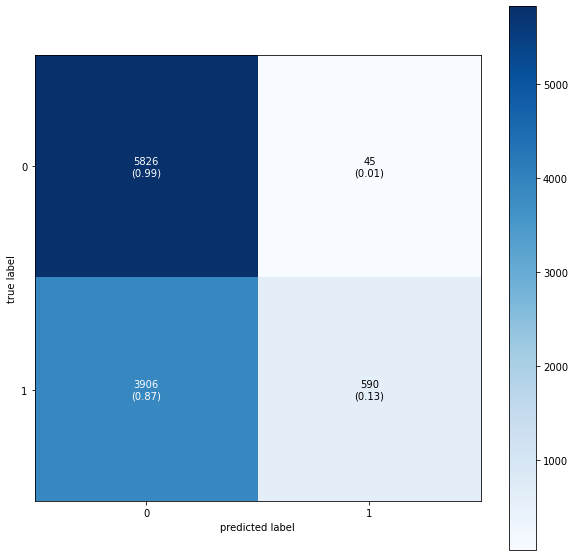

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_DT)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_DT)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.60      0.99      0.75      5871
         1.0       0.93      0.13      0.23      4496

    accuracy                           0.62     10367
   macro avg       0.76      0.56      0.49     10367
weighted avg       0.74      0.62      0.52     10367





**ROC CURVE**

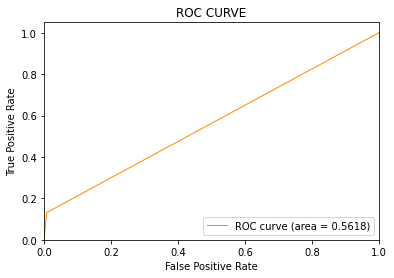

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_DT)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Motel explanation**

####**Trelawney : a unified Python API** [8,9]

In [ ]:
!pip install trelawney

In [ ]:
!pip install scipy

**SHAP**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from trelawney.shap_explainer import ShapExplainer

In [ ]:
from trelawney.shap_explainer import ShapExplainer
explainer = ShapExplainer()
explainer.fit(DTC_Model, X_train, y_train)

Feature importance of the model, according to SHAP


In [ ]:
feature_importance_graph = explainer.graph_feature_importance(X_train)
feature_importance_graph.update_layout(title='Shap Feature Importance')
feature_importance_graph.show()

**Surogate explainer**

In [ ]:
from trelawney.surrogate_explainer import SurrogateExplainer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
explainer = SurrogateExplainer(DecisionTreeClassifier(max_depth=4))
explainer.fit(DTC_Model, X_train, y_train)

**surogate decision tree**



In [ ]:
from IPython.display import Image
explainer.plot_tree(out_path='./tree_viz')
Image('./tree_viz.png', width=1000, height=500)

In [ ]:
explainer.adequation_score()

1.0

**lime**

In [ ]:
from trelawney.lime_explainer import LimeExplainer

### **Model Tunning**

**GridSearchCV**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 2092 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 4108 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 6700 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 9868 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 13612 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 15552 out of 15552 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
               

In [ ]:
print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Train Accuracy : 1.000
Test Accuracy : 0.999
Best Score Through Grid Search : 0.998
Best Parameters :  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
y_train

,RESULT_TEXT
12545,0.0
15205,0.0
13513,1.0
6203,0.0
3609,0.0
...,...
19544,0.0
19033,0.0
96,0.0
14140,0.0


In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


### **Create DT Rules**

**DT Rules**

In [ ]:
target = list(MiceImputed['RESULT_TEXT'].unique())
feature_names = list(X_train.columns)

In [ ]:
target

[0.0, 1.0]

In [ ]:
from sklearn.tree import export_text
r = export_text(DTC_Model, feature_names=feature_names)
print(r)

|--- TEHSIL <= 6.50
|   |--- REPORT_VERIFIED <= 7753.50
|   |   |--- class: 0.0
|   |--- REPORT_VERIFIED >  7753.50
|   |   |--- class: 0.0
|--- TEHSIL >  6.50
|   |--- AGE <= 24.50
|   |   |--- class: 0.0
|   |--- AGE >  24.50
|   |   |--- class: 1.0



### **Visualization**

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DTC_Model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True)



##**11.2-Random Forest**

### **Model training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
RF_model= RF.fit(X_train , y_train)
RF_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = RF_model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_RF = RF_model.predict(X_test)
RF_Acc=RF_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(RF_model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR_RF=confusion_matrix(y_test, y_pred_RF)
print(CR_RF)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_RF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 2, 5,],
          'min_samples_split': [2, 0.5, n_samples//2, ],
          'min_samples_leaf': [1, 0.5, n_samples//2, ],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2, ],
          'bootstrap':[True, False]
         }

In [ ]:
rf_classifier_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=params, n_jobs=-1, cv=3, verbose=1)
rf_classifier_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%rf_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%rf_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%rf_classifier_grid.best_score_)
print('Best Parameters : ',rf_classifier_grid.best_params_)

## **11.3-SVM Support Vector Machine**

### **Model Training**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm

In [ ]:

svc=svm.LinearSVC()

SVM_Model= svc.fit(X_train , y_train)
SVM_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = SVM_Model._predict_proba_lr(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_SVM = SVM_Model.predict(X_test)
SVM_Acc=SVM_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(SVM_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_SVM=confusion_matrix(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_SVM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_SVM=classification_report(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_SVM, tpr_SVM, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm


In [ ]:
params = {
            'C': [0.1, 0.5, 1.0, 10.0],
         }

In [ ]:
linear_svc_classifier_grid = GridSearchCV(LinearSVC(random_state=1, max_iter=1000000), param_grid=params, n_jobs=-1, cv=5, verbose=5)
linear_svc_classifier_grid.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%linear_svc_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%linear_svc_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%linear_svc_classifier_grid.best_score_)
print('Best Parameters : ',linear_svc_classifier_grid.best_params_)

## **11.4-Logistic Regression(LR)**

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
LR= LogisticRegression()
LR_Model= LR.fit(X_train , y_train)
LR_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LR_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_LR = LR.predict(X_test)
LR_Acc=LR_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_LR=confusion_matrix(y_test, y_pred_LR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LR=classification_report(y_test, y_pred_LR)
print(CR_LR)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

## **11.5 KNN Algorithm**

### **Model Training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN_Model= KNN.fit(X_train , y_train)
KNN_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = KNN_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_KNN = KNN.predict(X_test)
KNN_Acc=KNN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_KNN=confusion_matrix(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_KNN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_KNN=classification_report(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_KNN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [ ]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [ ]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
print('Train Accuracy : %.3f'%grid_search.score(X_train, y_train))
print('Test Accurqacy : %.3f'%grid_search.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

## **11.6-Naive Bayes (NB)**

### **Modle Training**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:

NB = GaussianNB()
NB_Model= NB.fit(X_train , y_train)
NB_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = NB_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_NB = NB_Model.predict(X_test)
NB_Acc=NB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NB_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NB=confusion_matrix(y_test, y_pred_NB)
print(CM_NB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NB=classification_report(y_test, y_pred_NB)
print(CM_NB)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)
plt.figure()
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

In [ ]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()

In [ ]:
complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

## **11.7- Deep Neural Multilayer Perceptron (MLP)**

### **Model Training**

In [ ]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier()
NN_Model= NN.fit(X_train , y_train)
NN_Model

### **Model Evulation**

**Predict Class Probability**

In [ ]:
preds_proba = NN_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_NN = NN.predict(X_test)
NN_Acc=NN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NN_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NN=confusion_matrix(y_test, y_pred_NN)
print(CM_NN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NN=classification_report(y_test, y_pred_NN)
print(CM_NN)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_NN, tpr_NN, thresholds = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)
plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']}

In [ ]:
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

## **11.8- XGBoost or Gradient Boosting (GB)**

### **Model Training**

In [ ]:
from xgboost import XGBClassifier
GB=XGBClassifier()
GB_Model= GB.fit(X_train , y_train)
GB_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = GB_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_GB = GB.predict(X_test)
GB_Acc=GB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(GB_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_GB=confusion_matrix(y_test, y_pred_GB)
print(CM_GB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_GB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_GB=classification_report(y_test, y_pred_GB)
print(CR_GB)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, y_pred_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_GB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

## 11.9 **ExtraTreeClassifier(ET)**

### **Model Training**

In [ ]:
from sklearn.tree import ExtraTreeClassifier
ET=ExtraTreeClassifier(random_state=0, max_depth=2)
ET_model= ET.fit(X_train , y_train)
ET_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = ET_model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_ET = ET_model.predict(X_test)
ET_Acc=ET_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(ET_model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_ET=confusion_matrix(y_test, y_pred_ET)
print(CM_ET)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_ET,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_ET=classification_report(y_test, y_pred_ET)
print(CR_ET)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_ET, tpr_ET, thresholds = roc_curve(y_test, y_pred_ET)
roc_auc_ET = auc(fpr_ET, tpr_ET)
plt.figure()
plt.plot(fpr_ET, tpr_ET, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_ET)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**Grid Search**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier

In [ ]:
grid = GridSearchCV(ExtraTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )

In [ ]:
grid.fit(X_train, y_train)


In [ ]:
print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

## **11.10 LGBMClassifier**

### **Model Training**

In [ ]:
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
LGBM_model= LGBM.fit(X_train , y_train)
LGBM_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LGBM_model.predict_proba(X_test)
print("class = ", preds_proba)


**Accuracy**

In [ ]:
y_pred_LGBM = LGBM_model.predict(X_test)
LGBM_Acc=LGBM_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LGBM_model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_LGBM=confusion_matrix(y_test, y_pred_LGBM)
print(CM_LGBM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LGBM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LGBM=classification_report(y_test, y_pred_LGBM)
print(CR_LGBM)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_LGBM, tpr_LGBM, thresholds = roc_curve(y_test, y_pred_LGBM)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)
plt.figure()
plt.plot(fpr_LGBM, tpr_LGBM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LGBM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [ ]:
params = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [ ]:

LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
rf_classifier_grid = GridSearchCV(estimator=LGBM, param_grid=params)
rf_classifier_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%rf_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%rf_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%rf_classifier_grid.best_score_)
print('Best Parameters : ',rf_classifier_grid.best_params_)

## **11.11 CatBoost**

### **Model Training**


In [ ]:
! pip install catboost

In [ ]:

from catboost import CatBoostClassifier, Pool

In [ ]:

#CTB = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'Logloss'})
CTB= CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

CTB_Model= CTB.fit(X_train , y_train)
CTB_Model

### **Model evaluation**


**Predict Class Probability**

In [ ]:
preds_class = CTB_Model.predict(X_test)
preds_proba = CTB_Model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

**Accuracy**



In [ ]:

y_pred_CTB = CTB_Model.predict(X_test)
CTB_Acc=CTB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(CTB_Model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_CTB=confusion_matrix(y_test, y_pred_CTB)
print(CM_CTB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_CTB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_CTB=classification_report(y_test, y_pred_CTB)
print(CR_CTB)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_CTB, tpr_CTB, thresholds = roc_curve(y_test, y_pred_CTB)
roc_auc_CTB = auc(fpr_CTB, tpr_CTB)
plt.figure()
plt.plot(fpr_CTB, tpr_CTB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_CTB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

# **12-Compare Modle performance**

## **12.1-ROC Curve for Models**

In [ ]:
plt.plot(fpr_DT, tpr_DT, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_RF, tpr_RF, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_SVM, tpr_SVM, marker='*', label='SVM', color = 'green')
plt.plot(fpr_LR, tpr_LR, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr_KNN, tpr_KNN, marker='*', label='KNN', color = 'blue')
plt.plot(fpr_NB, tpr_NB, marker='*', label='Naive Bayes', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Neural Network(NN)', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Gradient Boosting(GB)', color = 'black')
plt.plot(fpr_ET, tpr_ET, marker='*', label='Etra Tree Classifier(ET)', color = 'black')
plt.plot(fpr_LGBM, tpr_LGBM, marker='*', label='LGBMClassifer', color = 'black')
plt.plot(fpr_CTB, tpr_CTB, marker='*', label='CatBoost', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **12.2-Comparison of all algorithms Results**

In [ ]:
from prettytable import PrettyTable

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(DT_Acc,4)])
x.add_row(["Random Forest Algorithm", round(RF_Acc,4)])
x.add_row(["Support Vector Machine Algorithm", round(SVM_Acc,4)])
x.add_row(["LogisticRegression Algorithm", round(LR_Acc,4)])
x.add_row(["KNN Algorithm", round(KNN_Acc,4)])
x.add_row(["Naive Bayes", round(NB_Acc,4)])
x.add_row(["Neural Network", round(NN_Acc,4)])
x.add_row(["Gradient Boosting", round(GB_Acc,4)])
x.add_row(["ExtraTree Classifer ", round(ET_Acc,4)])
x.add_row(["LGBM Classifier ", round(LGBM_Acc,4)])
x.add_row(["CatBoost ", round(CTB_Acc,4)])
print(x)
print('\n')

# **Interpretable machine learning[14]**

## **1. Partial Dependence Plots (PDP)**

PDPs are plots that show the marginal effect of one or two features on a model's response variable(outcome).

That means taking one or two features in your dataset while controlling for other features and measure how they affect the outcome.

PDP is handy when determining whether a relationship between a specific feature and a target is linear or complex.

Recipe
- Start with a feature
- For every row in the dataset, change the value of the - - selected feature and make a prediction.
- Take the average prediction of different values of the feature, plot those predictions.

For categorical features, things are a little different. Let’s say you have categories A, B, and C; partial dependence would mean substituting all values within the feature with A, calculate the average prediction, and do the same with B and C. The result would be three average predictions.
Let’s make this concrete with an example. 

In [17]:
data.columns


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [32]:
def pdp(feature, df, x_labels, y_label):
    df_copy = df.copy()
    unique_vals = np.unique(df_copy[feature].values)
    y = []
    for val in unique_vals:
        df_copy[feature] = val
        X = df_copy[x_labels]
        y.append(np.average(DTC_Model.predict(X)))
    plt.ylim(2, 8)
    g = sns.lineplot(x=unique_vals, y=y)
    g.set(xticks=unique_vals)
    g.set(xticklabels=[])
    g.set(xlabel = feature)
    plt.show()

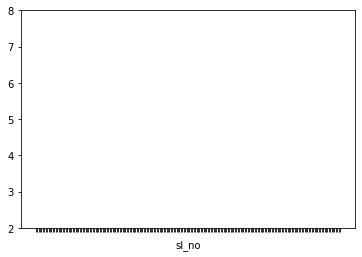

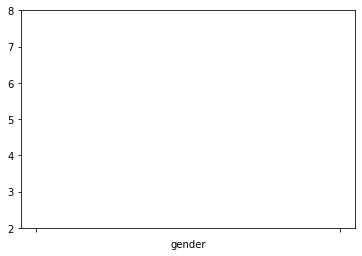

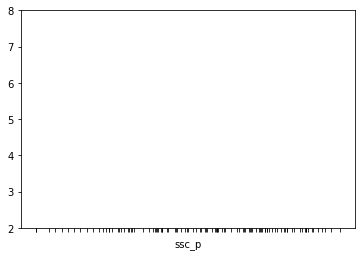

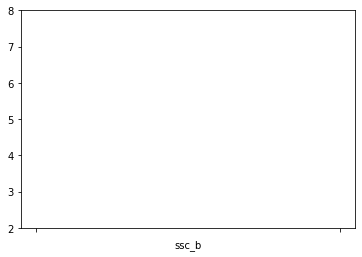

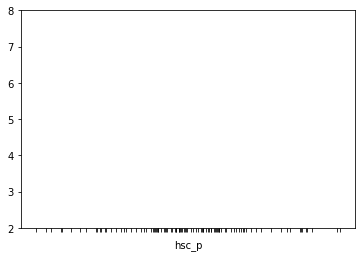

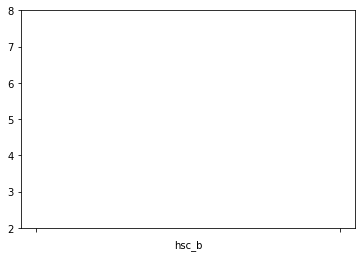

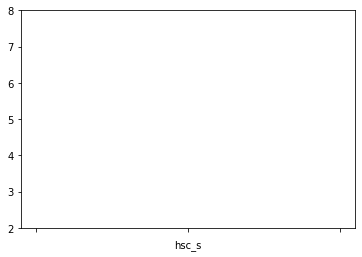

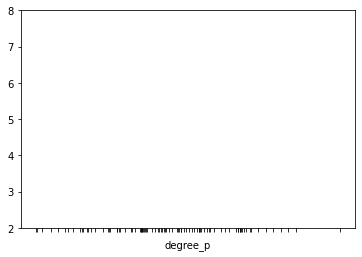

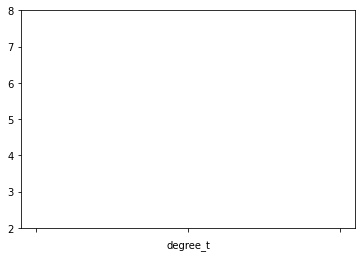

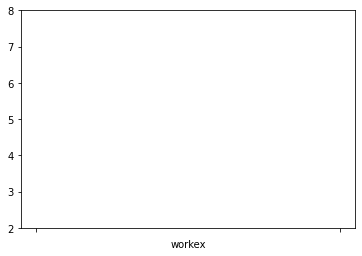

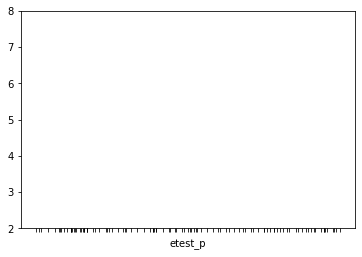

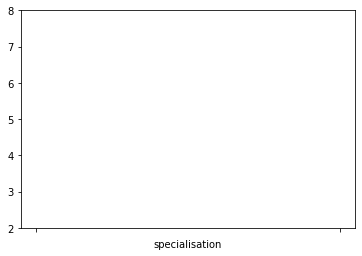

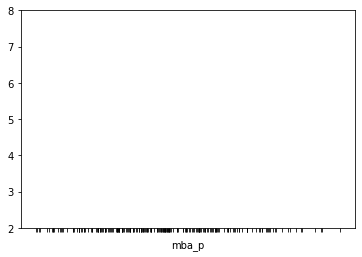

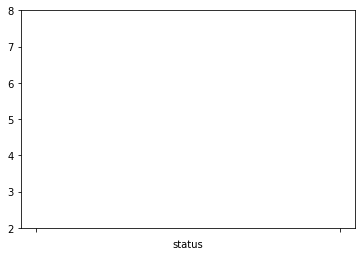

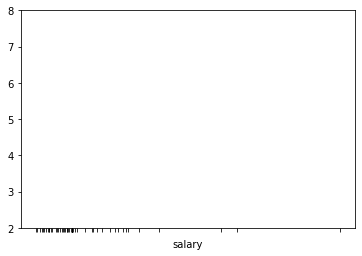

In [34]:
for v in ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary']:
    pdp(v, MiceImputed, ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'mba_p',
       'status', 'salary'], 'specialisation')

## **2. Individual conditional expectation (ICE) plot**[14]

ICE is similar to PDP, but what separates the two is ICE plots will show the average effects of the features of interest, along with visualizing the dependence of the prediction on a feature for each sample separately.
That means the plot will contain every instance of prediction change when a feature changes instead of the overall effect in PDP.
Another difference is for ICE plots, only one feature is supported.
What is the benefit of the ICE plot, you ask? It can help us catch an important relationship called the heterogeneous relationship created by interactions. That basically means we can tell whether the individual instances differ from the overall instance (average).
This relationship is obscured by PDP since it’s taking an average. Thus, ICE plots will provide us more insights into the relationship between the feature and the target.

In [35]:
MiceImputed.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [39]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [42]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [40]:
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(50, 50), learning_rate_init=0.01, early_stopping=True
    ),
)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 0.078s
Test R2 score: 0.11


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from time import time
tic = time()

print("Computing partial dependence plots...")
tic = time()
features = ["sl_no", "gender", "ssc_p", "ssc_b", "hsc_p", "hsc_b", "hsc_s",
       "degree_p", "degree_t", "workex", "etest_p", "mba_p",
       "status", "salary"]
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)
display.figure_.subplots_adjust(hspace=0.3)

## **3. Permutation Feature Importance**[14]

Permutation feature importance measures the increase in the model prediction error by shuffling a feature’s values and doing so for each feature.

The word permutation means rearrangement, which in our case applies to the rearrangement of a column’s values.

**Recipe**

- Shuffle values in a specific column, and make predictions.
- Use the predictions to calculate the evaluation metric. - Any drop in performance signifies the importance of the variable and vice versa.
- Move on to the subsequent columns and repeat steps 1 and 2. Do this until you have the importance of every column

In [ ]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(DTC_Model,n_iter=2).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
!pip install eli5

## **Local interpretable model-agnostic explanations (LIME)**[14]

LIME is a concept that trains local surrogate models around the predictions of a black-box model.

What are local surrogate models? They are interpretable models, i.e., linear regression or decision trees, that can explain the predictions of a black-box model.

What are local surrogate models? They are interpretable models, i.e., linear regression or decision trees, that can explain the predictions of a black-box model.

This means you can use models like decision trees as explanations without actually having to use them to make predictions.
Compared to the previous methods, which are global interpretations, LIME provides local interpretability for a single prediction. This means you zoom in on a single instance, examine what the model predicts for this particular input, and explain why.

**Recipe (source)**

- Select your instance of interest for which you want to have an explanation of its black box prediction.
- Perturb your dataset and get the black box predictions for these new points.
- Weight the new samples according to their proximity to the instance of interest.
- Train a weighted, interpretable model on the dataset with the variations.
- Explain the prediction by interpreting the local model.

In [ ]:
!pip install lime

In [55]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),feature_names=X_train.columns,class_names=['bad', 'good'],mode='classification')

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=DTC_Model.predict_proba
)

exp.show_in_notebook(show_table=True)

# **Pipelines** [11]

The Pipeline tool in scikit-learn is very helpful to simplify your machine learning models. Pipelines can be used to chain multiple steps into one, so that the data will go through a fixed sequence of steps. Thus, instead of calling every step separately, the pipeline concatenates all steps into one system. To create such a pipeline, we make use of the make_pipeline function.
Below, a simple example is shown, where the pipeline consists of an imputer, which imputes missing values (if there are any), and a logistic regression classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=25, n_features=4, n_classes=2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

Now, we can use the pipeline to fit our training data and to make predictions for the test data. First, the training data goes through to imputer, and then it starts training using the logistic regression classifier. Then, we are able to predict the classes for our test data:

In [ ]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
pd.DataFrame({'Prediction': y_pred, 'True': y_test})

**Save a Pipeline model using joblib**

Pipeline models created through scikit-learn can easily be saved by making use of joblib. In case your model contains large arrays of data, each array is stored in a separate file. Once saved locally, one can easily load (or, restore) their model for use in new applications.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import joblib
X, y = make_classification(n_samples=20, n_features=4, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

pipe.fit(X_train, y_train)
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

Now, the fitted pipeline model is saved (dumped) on your computer through joblib.dump. This model is restored through joblib.load, and can be applied as usual afterwards:

In [ ]:
new_pipe = joblib.load('.../pipe.joblib')
new_pipe.predict(X_test)

# **Ensemble techniques**

Ensemble methods improve generalisation of the machine learning solution. As a consequence, they prevent over-fitting.The goal is to create a meta-classifier. This meta-classifier has a better generalisation performance than the individual classifiers.[13]

Think of ensemble meta classifier as a solution where a large number of classifiers are combined to produce more accurate and robust predictions than the predictions by each individual classifier.[13]


## **Principle Voting**[13]

One of the most famous ensemble methods is based on the majority voting principle. Imagine we have a number of judges who are voting the candidates in a dancing competition. It is likely that the result of the combined judges will give us better candidates than the result by an individual judge.

The key in majority voting principle is to take the predicted value that received the most number of votes.

**How Does Ensemble Work?**

Let’s consider that there are five classification algorithms:
- Random forests
- Support vector machines
- Logistic regression classifier
- Boosted Trees
- Nearest Neighbour

Now what we could do is to build an ensemble that combines all of the five classification algorithms into one. We can also try passing and fitting different subsets of our training set into an algorithm to get better predictions.


![](https://drive.google.com/uc?export=view&id=1ljMD_0xWrHuSynn3nMZqiJEuH2Q4wCq8)

Each of the classification algorithm will produce its predictions. We can them perform majority votes principle and take the prediction which occurred the most.

When we combine the classifiers then the total error rate decreases if compared to the error rate of each individual classifier

For example, let’s assume we are predicting whether a stock price will increase or decrease. Three out of five of the algorithms predict that the price will go up. Therefore, we will take the final prediction that the stock price will increase.

Hence ensemble methods produce better predictions and are robust than individual ensembles.

Majority voting is essentially built on top of the Mode mathematical concept, which takes the most occurring value as the average.

**Let’s Implement An Ensemble Classifier In Python**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

model1 = KNeighborsClassifier()
model2 = RandomForestClassifier(n_estimators=50, random_state=0)
model3 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
classifier = VotingClassifier(estimators=[
   ('kn', model1), ('rf', model2), ('dt', model3)], voting='hard')

for model in ([model1, model2, model3, classifier]):
     scores = cross_val_score(model, X_test, y_test, cv=3,  scoring='accuracy')
     print(scores)
     print("Accuracy: " % scores.mean())

After running the code, I encountered that the mean of the ensemble model (VotingClassifer) was better than the other models. It implies that the predictive performance of an ensemble classifier is superior than the performance of the individual classifiers.

VotingClassifier is useful when we have a number of equally well performing models as it can balance out their individual weaknesses.

## **Bagging**[12]

Bagging, which is also known as bootstrap aggregating sits on top of the majority voting principle. The samples are bootstrapped each time when the model is trained. When the samples are chosen, they are used to train and validate the predictions. The samples are then replaced back into the training set. The samples are selected at random. This technique is known as bagging.

To sum up, base classifiers such as decision trees are fitted on random subsets of the original training set. Subsequently, the individual predictions are aggregated (voting or averaging etc). The final results are then used as predictions. It reduces variance of a black box estimator.

**Bagging can decrease the degree of overfitting**[12]


Imagine you want to find the most visited city in the world next month. To represent the population, you pick a sample of 10000 people. Now imagine this sample is placed in a bag. You take 5000 people out of the bag each time and feed the input to your machine learning model. And then you place the samples back into your bag. Once the results are predicted, you then use the maximum voting to pick the best results.

![](https://drive.google.com/uc?export=view&id=1bAh-egMhWqe28_mhp8PL0jgdG7_17lc6)

**Bagging can improve the accuracy of unstable models**[12]

This recursive nature of picking the samples at random with replacement can improve the accuracy of an unstable machine learning model. Additionally it prevents overfitting and makes your model genaralise better on unseen data

**Machine Learning Bagging In Python**[12]

Finally, this section demonstrates how we can implement bagging technique in Python.

In [ ]:
from sklearn.ensemble import BaggingClassifier
ds = DecisionTreeClassifier(criterion='entropy',max_depth=None)
bag = BaggingClassifier(max_samples=1.0,bootstrap=True)
DTC_Model_bag=bag.fit(X_train, y_train)

In [ ]:
y_pred_DT = DTC_Model_bag.predict(X_test)
DT_Acc=DTC_Model_bag.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC_Model_bag.score(X_test, y_test)))

Accuracy score= 0.5846


The code above will use the default base_estimator of decision tree. It will fit the random samples with replacements. Samples will be taken for all of the features in the training set.

This code will yield results that are more accurate, the model will not be over-fitted to the training set data and most importantly it will reduce the variance of the decision tree.

# **Regression Model Training and Evaluation**

**Dataset**

In [58]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [60]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [71]:
cal_housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

## **Regression** 

### **Data Ploting**[15]

KeyError: ignored

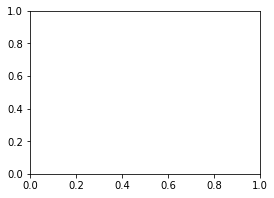

In [80]:
import matplotlib.pyplot as plt  
%matplotlib inline
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
plt.scatter(cal_housing['MedInc'], cal_housing['target'], 'blue')
plt.xlabel('MedInc')
plt.ylabel('target')
plt.show

In [79]:
y_train['target']

IndexError: ignored

# **References**

[1- Scikit-Learn - Ensemble Learning : Bootstrap Aggregation(Bagging) & Random Forests](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests#2.4)

[2- Scikit-Learn - Decision Trees](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-decision-trees#2)

[3- Deep Neural Multilayer Perceptron (MLP) with Scikit-learn](https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e)

[4- Akramz
/
Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow
Public](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow)

[5- XGBoost hyperparameter tuning in Python using grid search](https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/)

[6- KNN Classifier in Sklearn using GridSearchCV with Example](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/)

[7-Decision Tree Classifier in Python Sklearn with Example](https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/)

[8- Introducing Trelawney : a unified Python API for interpretation of Machine Learning Models](https://medium.com/analytics-vidhya/introducing-trelawney-a-unified-python-api-for-interpretation-of-machine-learning-models-6fbc0a1fd6e7)

[9-Titanic: explaining predictions with Trelawney](https://www.kaggle.com/aredier/titanic-explaining-predictions-with-trelawney)

[10-Yellowbrick; Machine Learning Visualization-need to implement](https://hersanyagci.medium.com/yellowbrick-machine-learning-visualization-a8c2e9cae78e)

[11-Scikit-Learn (Python): 6 Useful Tricks for Data Scientists](https://levelup.gitconnected.com/scikit-learn-python-6-useful-tricks-for-data-scientists-1a0a502a6aa3)

[12-Machine Learning Bagging](https://medium.com/fintechexplained/machine-learning-bagging-6c0c2d002595)

[13-Let’s Talk About Machine Learning Ensemble Learning In Python](https://medium.com/fintechexplained/lets-talk-about-machine-learning-ensemble-learning-in-python-382747e5fba8)

[14-Making Machine Learning Models Interpretable](https://medium.com/bitgrit-data-science-publication/making-machine-learning-models-interpretable-3f9efcf64a9)

[15-Simple Linear Regression](https://towardsdatascience.com/simple-linear-regression-35b3d940950e)


[New ML algorithms developed by Facebook](https://www.reddit.com/r/MachineLearning/comments/it44ix/r_new_ml_algorithms_developed_by_facebook/)

[An Introduction To Decision Trees and Predictive Analytics](https://towardsdatascience.com/an-introduction-to-decision-trees-and-predictive-analytics-92924a8a77e7)


[10 Regression Metrics Data Scientist Must Know (Python-Sklearn Code Included)](https://medium.com/@tzjy/10-regression-metrics-data-scientist-must-know-python-code-included-c6ca40320504)

[What is CatBoost Algorithm? Step-by-Step Tutorial](https://dhavalthakur.medium.com/what-is-catboost-algorithm-step-by-step-tutorial-2c93aa566068)

